# NHTS Vehicle Type EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
vehicles = pd.read_csv("vehpub.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
vehicles.head(100)

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,VEHOWNED,VEHOWNMO,ANNMILES,HYBRID,PERSONID,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTHHFIN,BESTMILE,BEST_FLG,BEST_EDT,BEST_OUT,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,1,2007,10,49,49032,1,1,3,69000,-1,1,-1,1000,2,3,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,14611.926637,1,-1,4,T,50,1500,750,750,20,750,300,487.064221,1126.457778,30,-9,2.312750,1
1,30000007,2,2004,13,49,49442,1,2,-8,164000,-1,1,-1,2500,2,-8,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,4767.090946,3,-1,-1,T,50,1500,750,750,20,750,300,250.899523,580.267873,19,-9,2.312750,1
2,30000007,3,1998,19,19,19014,1,1,1,120000,-1,1,-1,900,2,1,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,8000.324552,1,-1,-1,T,50,1500,750,750,20,750,300,444.462475,1027.930589,18,-9,2.312750,1
3,30000007,4,1997,20,19,19021,1,1,2,-88,-1,1,-1,500,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,725.932347,2,-1,-1,T,50,1500,750,750,20,750,300,40.329575,93.272224,18,-9,2.312750,1
4,30000007,5,1993,24,20,20481,1,4,2,300000,-1,1,-1,10000,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,12437.658757,1,-1,-1,T,50,1500,750,750,20,750,300,888.404197,2054.656806,14,-9,2.312750,1
5,30000008,1,2014,3,20,20028,1,1,97,-88,-1,1,-1,8000,2,97,5,1,2,4,8,2,WI,55,2,2,201608,2,2,5,2,4,6,2,3,2,32,1,2,33460,2,69.513032,6099.620939,3,-1,-1,R,5,300,300,150,5,300,300,210.331757,476.716926,29,-9,2.266500,1
6,30000008,2,2010,7,20,20024,1,3,2,-88,-1,1,-1,10000,2,2,5,1,2,4,8,2,WI,55,2,2,201608,2,2,5,2,4,6,2,3,2,32,1,2,33460,2,69.513032,12865.611703,2,-1,-1,R,5,300,300,150,5,300,300,677.137458,1534.732049,19,-9,2.266500,1
7,30000008,3,2008,9,20,20039,1,1,97,-88,-1,1,-1,10000,2,97,5,1,2,4,8,2,WI,55,2,2,201608,2,2,5,2,4,6,2,3,2,32,1,2,33460,2,69.513032,6118.535423,3,-1,-1,R,5,300,300,150,5,300,300,226.612423,513.617057,27,-9,2.266500,1
8,30000008,4,2004,13,20,20481,1,4,1,128000,-1,1,-1,10000,2,1,5,1,2,4,8,2,WI,55,2,2,201608,2,2,5,2,4,6,2,3,2,32,1,2,33460,2,69.513032,9777.895446,1,-1,-1,R,5,300,300,150,5,300,300,651.859696,1477.440002,15,-9,2.266500,1
9,30000012,1,2011,6,58,58037,1,1,1,70115,-1,1,-1,11000,2,1,5,1,1,2,10,1,NY,36,1,1,201607,1,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,79.419586,4616.917047,1,-1,-1,C,80,17000,17000,5000,60,17000,7000,219.853193,542.011404,21,-9,2.465333,1


In [15]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [16]:
vehicles.columns

Index(['HOUSEID', 'VEHID', 'VEHYEAR', 'VEHAGE', 'MAKE', 'MODEL', 'FUELTYPE',
       'VEHTYPE', 'WHOMAIN', 'OD_READ', 'HFUEL', 'VEHOWNED', 'VEHOWNMO',
       'ANNMILES', 'HYBRID', 'PERSONID', 'TRAVDAY', 'HOMEOWN', 'HHSIZE',
       'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'WRKCOUNT', 'TDAYDATE', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL', 'URBAN',
       'URBANSIZE', 'URBRUR', 'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE',
       'HH_HISP', 'HH_CBSA', 'SMPLSRCE', 'WTHHFIN', 'BESTMILE', 'BEST_FLG',
       'BEST_EDT', 'BEST_OUT', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN', 'HTRESDN',
       'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'GSYRGAL', 'GSTOTCST',
       'FEGEMPG', 'FEGEMPGA', 'GSCOST', 'FEGEMPGF'],
      dtype='object')

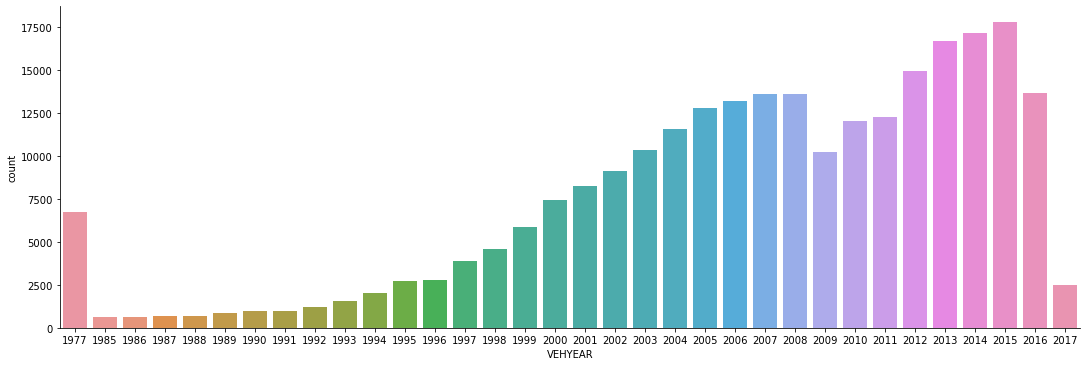

In [17]:
sns.catplot(data=vehicles[vehicles['VEHYEAR'] >= 0], kind='count', x='VEHYEAR', aspect=3)

Pretty steady increase in vehicle data year by year with a couple of exceptions. There seems to be a big gap between 1977 and 1985, with an unusually high amount of cars registered in 1977. Vehicle ownership seems to have gone down in 2009 post financial crisis as well.

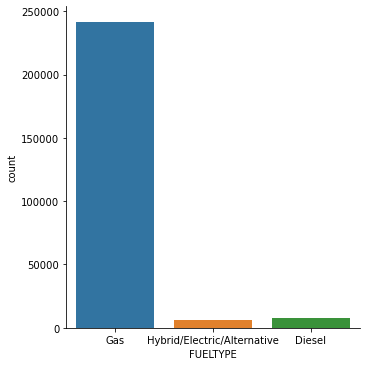

In [18]:
vehicles['FUELTYPE'] = vehicles['FUELTYPE'].replace({1: 'Gas',
                                                    2: 'Diesel',
                                                    3: 'Hybrid/Electric/Alternative',
                                                    4: 'Other'})
fuel_types = ['Gas', 'Diesel', 'Hybrid/Electric/Alternative', 'Other']
sns.catplot(data=vehicles[vehicles['FUELTYPE'].isin(fuel_types)], kind='count', x='FUELTYPE')

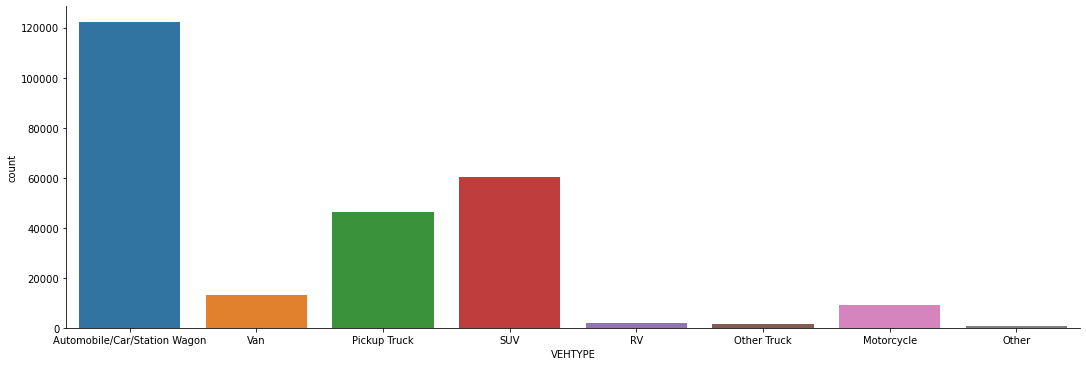

In [19]:
vehicles['VEHTYPE'] = vehicles['VEHTYPE'].replace({1: 'Automobile/Car/Station Wagon',
                                                    2: 'Van',
                                                    3: 'SUV',
                                                    4: 'Pickup Truck',
                                                    5: 'Other Truck',
                                                    6: 'RV',
                                                    7: 'Motorcycle',
                                                    97: 'Other'})
veh_types = ['Automobile/Car/Station Wagon', 'Van', 'SUV', 'Pickup Truck', 'Other Truck', 'RV', 'Motorcycle', 'Other']
sns.catplot(data=vehicles[vehicles['VEHTYPE'].isin(veh_types)], kind='count', x='VEHTYPE', aspect=3)

/tmp/ipykernel_424/2200526936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIF_CYC'] = df['LIF_CYC'].replace({1: '1 Adult, 0 Child',


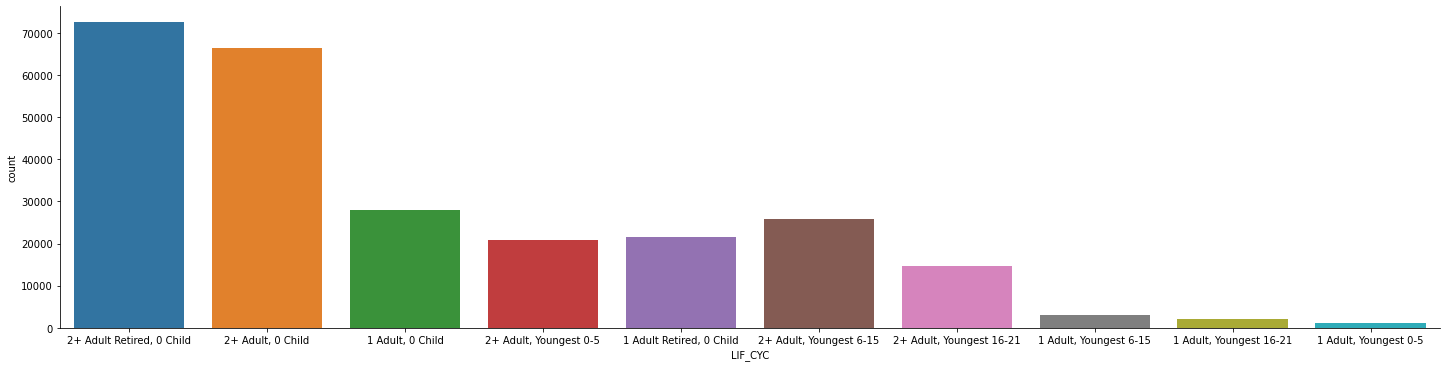

In [24]:
nums = np.arange(1, 11).tolist()
df = vehicles[vehicles['LIF_CYC'].isin(nums)]
df['LIF_CYC'] = df['LIF_CYC'].replace({1: '1 Adult, 0 Child',
                2: '2+ Adult, 0 Child',
                3: '1 Adult, Youngest 0-5',
                4: '2+ Adult, Youngest 0-5',
                5: '1 Adult, Youngest 6-15',
                6: '2+ Adult, Youngest 6-15',
                7: '1 Adult, Youngest 16-21',
                8: '2+ Adult, Youngest 16-21',
                9: '1 Adult Retired, 0 Child',
                10: '2+ Adult Retired, 0 Child'})
sns.catplot(data=df, kind='count', x='LIF_CYC', aspect=4)

LIF_CYC - Life Cycle classification for the household, derived by attributes pertaining to age, relationship, and work status.

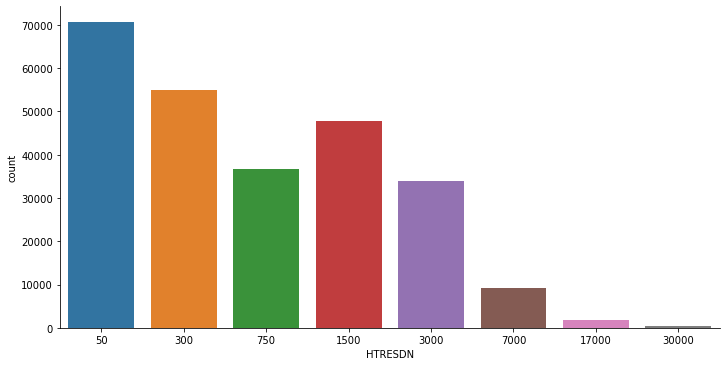

In [26]:
nums = [-9]
df = vehicles[~vehicles['HTRESDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTRESDN', aspect=2)

HTRESDN - Category of housing units per square mile in the census tract of the household's home location <br>
50=0-99 <br>
300=100-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
7000=4,000-9,999 <br>
17000=10,000-24,999 <br>
30000=25,000-999,999

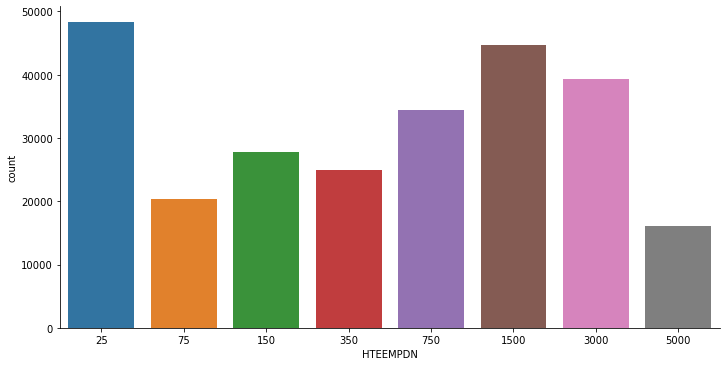

In [27]:
nums = [-9]
df = vehicles[~vehicles['HTEEMPDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTEEMPDN', aspect=2)

HTEEMPDN - Category of workers per square mile in the census tract of the household's home location <br>
25=0-49 <br>
75=50-99 <br>
150=100-249 <br>
350=250-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
5000=4,000-999,999

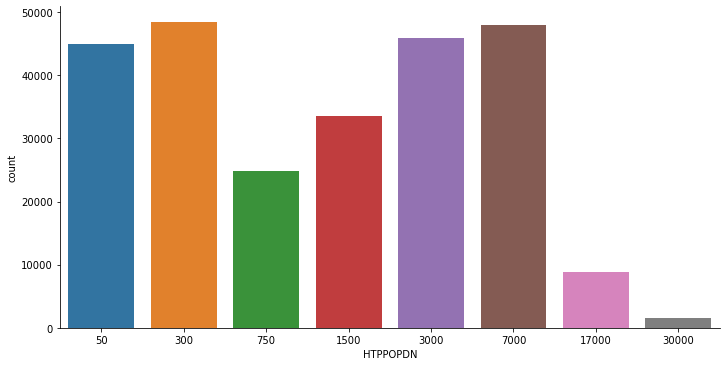

In [28]:
nums = [-9]
df = vehicles[~vehicles['HTPPOPDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTPPOPDN', aspect=2)

HTPPOPDN - Category of population density (persons per square mile) in the census tract of the household's home location <br>
50=0-99 <br>
300=100-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
7000=4,000-9,999 <br>
17000=10,000-24,999 <br>
30000=25,000-999,999

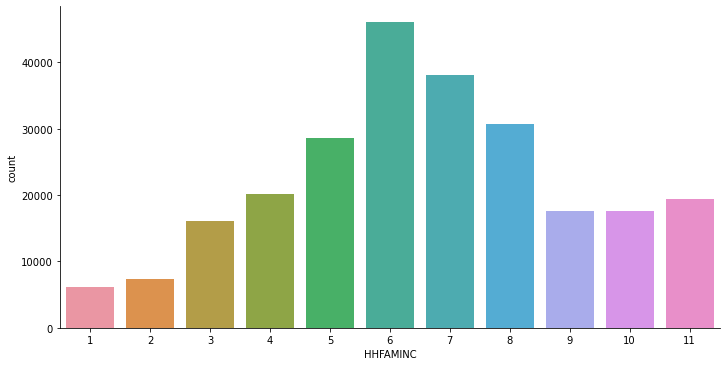

In [38]:
nums = [-9, -8, -7]
df = vehicles[~vehicles['HHFAMINC'].isin(nums)]
sns.catplot(data=df, kind='count', x='HHFAMINC', aspect=2)

HHFAMINC - Household income
01=Less than \\$10,000 <br>
02=\\$10,000 to \\$14,999 <br>
03=\\$15,000 to \\$24,999 <br>
04=\\$25,000 to \\$34,999 <br>
05=\\$35,000 to \\$49,999 <br>
06=\\$50,000 to \\$74,999 <br>
07=\\$75,000 to \\$99,999 <br>
08=\\$100,000 to \\$124,999 <br>
09=\\$125,000 to \\$149,999 <br>
10=\\$150,000 to \\$199,999 <br>
11=\\$200,000 or more

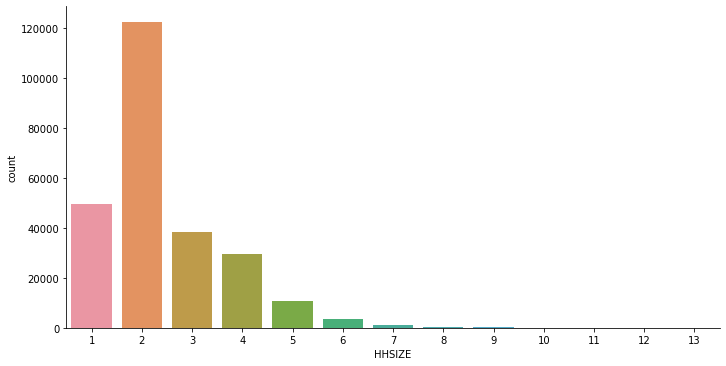

In [39]:
nums = [-9, -8, -7]
df = vehicles[~vehicles['HHSIZE'].isin(nums)]
sns.catplot(data=df, kind='count', x='HHSIZE', aspect=2)

<AxesSubplot:xlabel='VEHYEAR', ylabel='BESTMILE'>

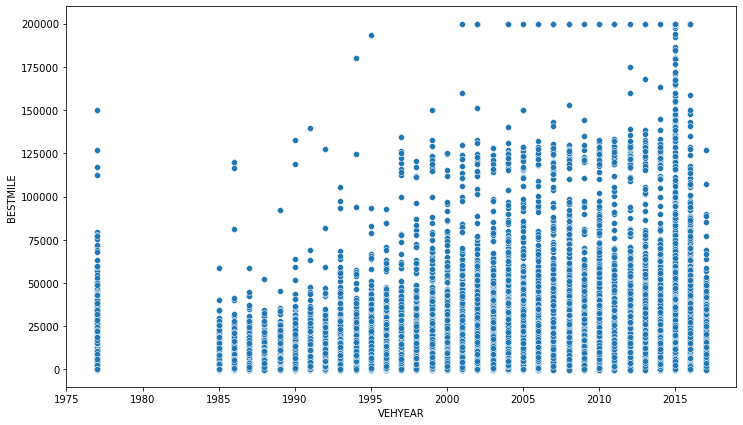

In [8]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['VEHYEAR'] >= 0], x='VEHYEAR', y='BESTMILE')

BESTMILE - Best estimate of annual miles.

Text(0.5, 1.0, 'Annual Gas Consumption by Area Classification')

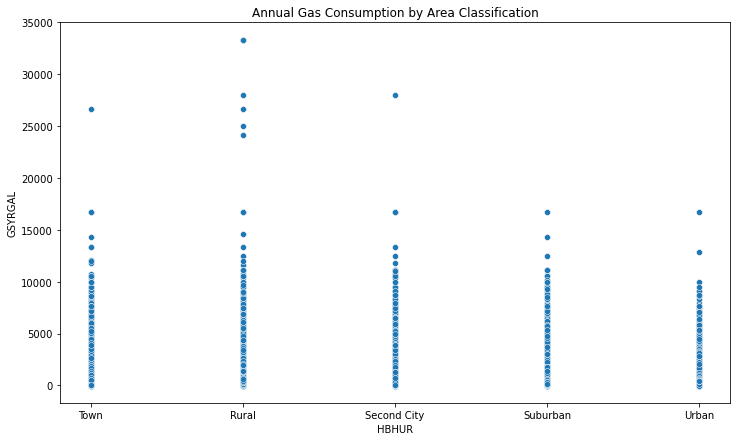

In [10]:
hbhur = ['Town', 'Rural', 'Second City', 'Suburban', 'Urban']
vehicles['HBHUR'] = vehicles['HBHUR'].replace({'T': 'Town',
                                               'R': 'Rural',
                                               'C': 'Second City',
                                               'S': 'Suburban',
                                               'U': 'Urban'})
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['HBHUR'].isin(hbhur)], x='HBHUR', y='GSYRGAL').set_title('Annual Gas Consumption by Area Classification')

Text(0.5, 1.0, 'Fuel Economy by Vehicle Year & Fuel Type')

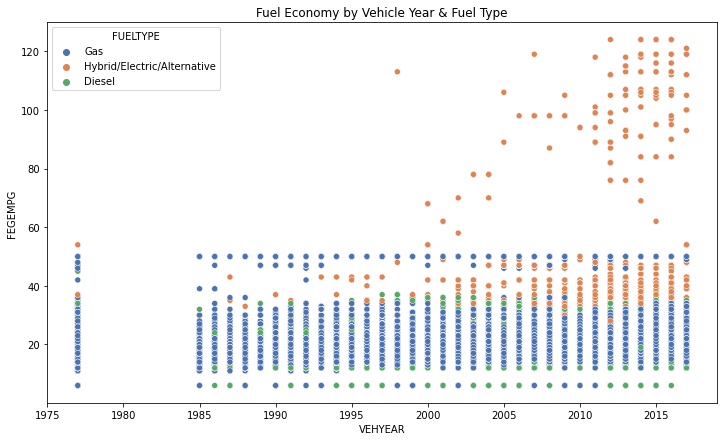

In [11]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='FEGEMPG', hue='FUELTYPE', palette='deep').set_title('Fuel Economy by Vehicle Year & Fuel Type')

Text(0.5, 1.0, 'Fuel Economy by Odomoter Reading & Fuel Type')

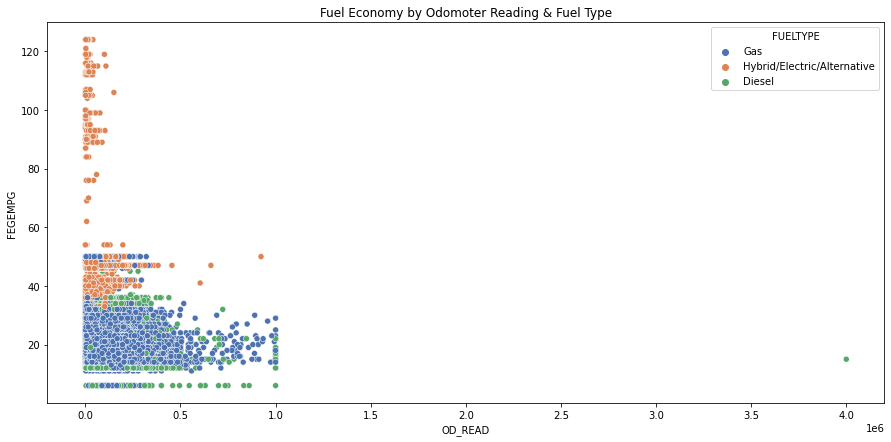

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=vehicles[(vehicles['OD_READ'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='OD_READ', y='FEGEMPG', hue='FUELTYPE', palette="deep").set_title('Fuel Economy by Odomoter Reading & Fuel Type')

Text(0.5, 1.0, 'Annual Fuel Cost by Vehicle Year & Fuel Type')

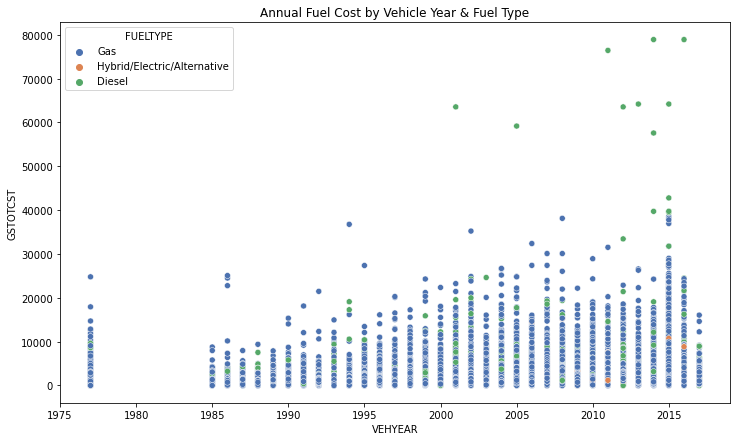

In [13]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='GSTOTCST', hue='FUELTYPE', palette="deep").set_title('Annual Fuel Cost by Vehicle Year & Fuel Type')